# NFT Value and Rarity
NFT price prediction using Machine Learning

> NFTs (Non Fungible Tokens) have dramatically increased in value with the recent upsurge in popularity of cryptocurrencies. NFT project was launched in 2017 by Larva Labs Studio and is traded on the Ethereum blockchain. The relationship between a specific NFT and its value is neither straightforwards nor intuitive and is thought by many to be due to the rarity of a specific NFT's attributes. Investors seeking to enter the nascent NFT market need to understand the predictive value that attributes may have on NFT price to improve returns on investment.

> This project highlights the complex nature between NFT value and the rarity of NFT attributes. Findings are presented on the key trends and variables such as NFT type and accessories that drive NFT value.  NFT value is shown as current price compared to the moving average of recent NFT sales in both Ethereum and US Dollar denominations. Ethereum value is calculated by the daily closing price in US Dollars. 

*** Please put punk_id number to see image and information (type, price, accessories).

## Basic Ideas
1. NFTs Price and Attributes
    - Which types and accessories have higher value?
2. NFTs Price and Rarity
    - Do the rarity on types, accessories, and combination of the accessories have higher value? 

## Datasets
1. CryptoPunks Transaction Data
> The dataset consists of all CryptoPunks transactions since 2017 and PNG images of 10,000 Punks. The data set included almost 170,000 transactions, and its columns are described briefly in the below.
    - Punk_id (NFT id): 10,000 unique Punks
    - Price: Denominated in Ethereum
    - NFT Type: 5 types including Female, Male, Alien, Ape, Zombie
    - Accessories: 87 accessories a Punk can wear (earring, wild hair etc.)
    - Count of Accessories 
    - Transaction Type: Sold, bid, offered, claimed
    - Transaction Date <br/>
    Transactions consist of Initial Punk "Claim" in 2017, Punk sales from user to user, along with sales price in ETH and USD equivalent, Bids and Offers; an owner can list a Punk for any price in ETH (offer) and anyone with ETH in their wallet can make a bid for a Punk, which the owner has discretion to accept.<br/>


2. Ethereum Price Data
> The price history of Ethereum is matched with the specific period matching with the CryptoPunks transaction date.

## Issues
1. Passage of time
    - NFT price generally increased after launch, but this increase is not constant in time nor is consistent between NFTs within a collection. Hence, we need to normalize the value of a specific NFT sale compared to recent sales of similar NFTs, both in Ethereum and Dollar units. 
    - Therefore, this project compares each NFT sale with the average price of the most recent 100 NFT transactions.
    - Ethereum price history would also be taken into consideration.
2. Rarity
    - Rarity is the crucial factor in determining economic value. Since NFTs have both type and accessories that may be common or rare, it wil be of interest to visualize the relationship between rarity and NFT value.
3. multi-label problem
    - Since each NFT has more than one accessory, effectively processing data with combinations of accessories (a.k.a. multi-label problem) will be an interesting aspect of this project. Possible approaches are looking at each accessory individually or looking at combinations. When analyzing accessories individually, the weight or impact of each category of accessories would need to be determined.

## NFT Value Conversion using Moving Average

In order to calculate the current value of NFTs, we need to consider the value of NFTs in both Etuereum and USD.
Specifically, calculate 1) moving average of most recent 100 NFT transactions 2) difference between each NFT and moving average 3) difference divided by moving average (a.k.a error rate using %). 4)Finally, current NFT value (a.k.a. corrected price) will be calculated by multiplying moving average with the error rate plus 100. 

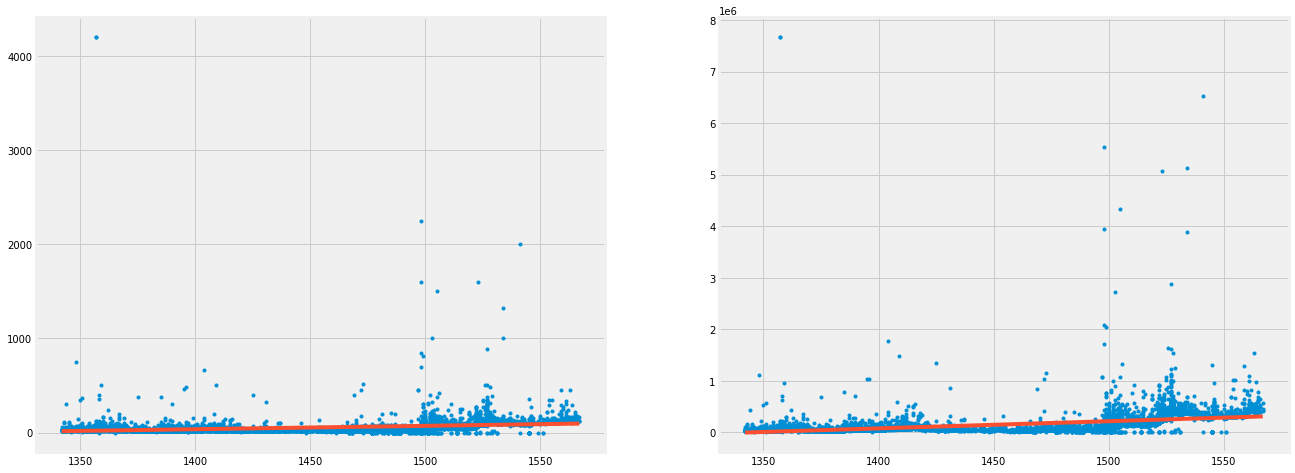

In [14]:
start_idx = 10000
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))

# ax1: days & eth
x = df_txn_history['days'][start_idx:]
y = df_txn_history['eth'][start_idx:]
m, b = np.polyfit(x, y, 1)
ax1.plot(x, y, '.')
ax1.plot(x, m*x+b)

# ax2: days & price
y2 = df_txn_history['price'][start_idx:]
m, b = np.polyfit(x, y2, 1)
ax2.plot(x, y2, '.')
ax2.plot(x, m*x+b)
plt.show()

Above graphs compare NFT values denominated in Ethereum vs USD.  x is days (left to right x-axis is past to current). To better understand the trend, only NFTs traded beyond first 10,000 transactions is shown. Both graphs have similar patterns, but the graph denominated in USD shows more spread.

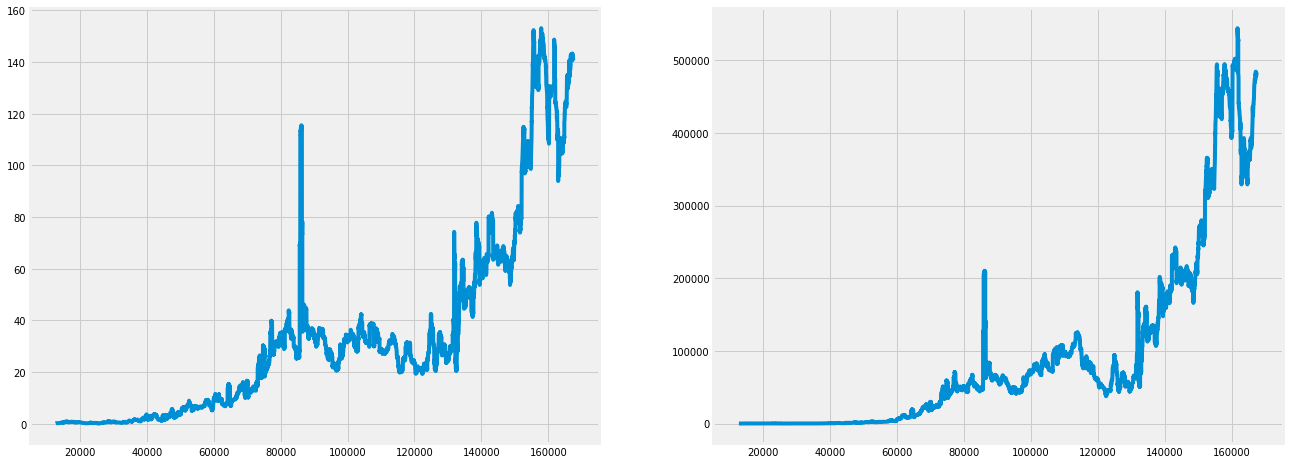

In [15]:
rolling_eth = df_txn_history['eth'].rolling(window=100)
rolling_mean_eth = rolling_eth.mean()
rolling_price = df_txn_history['price'].rolling(window=100)
rolling_mean_price = rolling_price.mean()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
ax1.plot(rolling_mean_eth)
ax2.plot(rolling_mean_price)

Above graphs are NFT values calculating using moving average with value denominated in Ethereum (left) and USD (right). Variance is lower in NFT values denominated in Ethereum (left). 

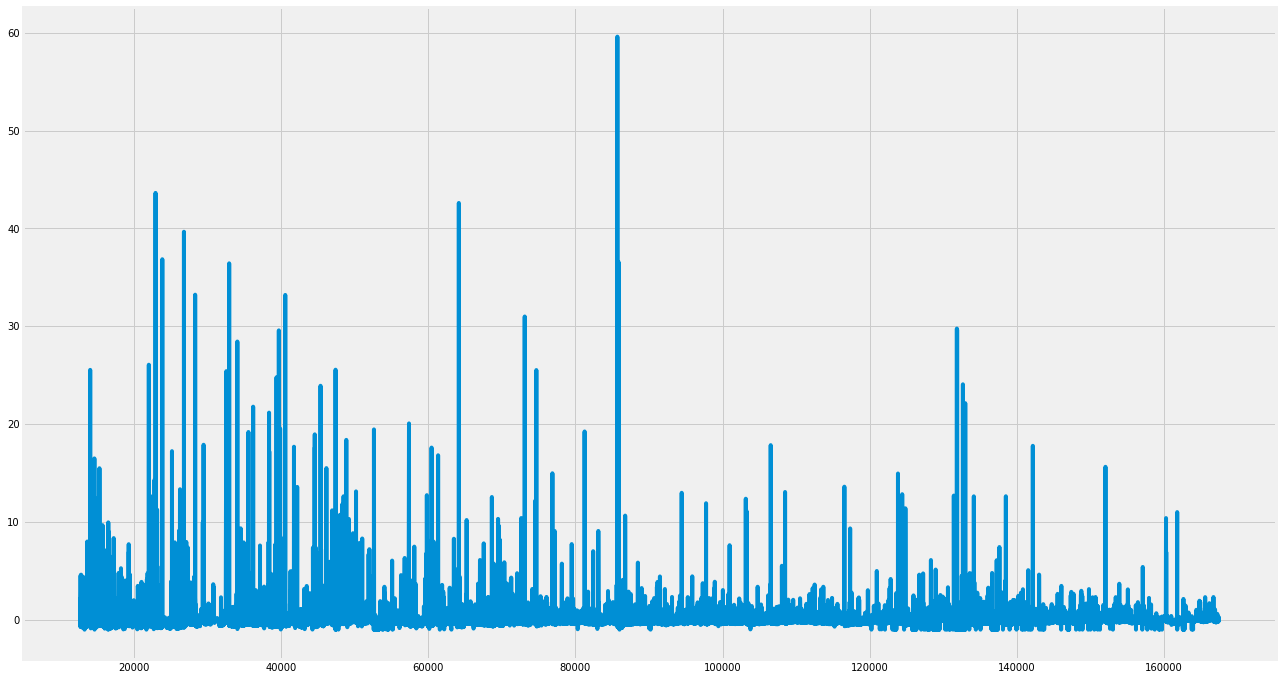

In [16]:
df_txn_history['rolling_mean_price'] = rolling_mean_price
df_txn_history['price_error_ratio'] = (df_txn_history['price'] - df_txn_history['rolling_mean_price'])/df_txn_history['rolling_mean_price']
df_txn_history = df_txn_history.dropna(subset=['price_error_ratio'])
plt.rcParams["figure.figsize"] = (20,12)
plt.plot(df_txn_history['price_error_ratio'])

The error rate is shown above. In general, transaction prices are close to the moving average price, but there are quite a few transactions where price significantly exceeds the moving average.

In [17]:
df_txn_history['price_corrected'] = (df_txn_history['price_error_ratio'] + 100) * df_txn_history['rolling_mean_price'].values[-1] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## NFT Price and Rarity
- Do NFTs with rare type have higher value? <br/>
- Do NFTs with rare accessories have higher value? <br/>
- Do NFTs with a cominbation of rare accessories have higher value?

### Do the NFTs with rare type have higher value? 

<BarContainer object of 5 artists>

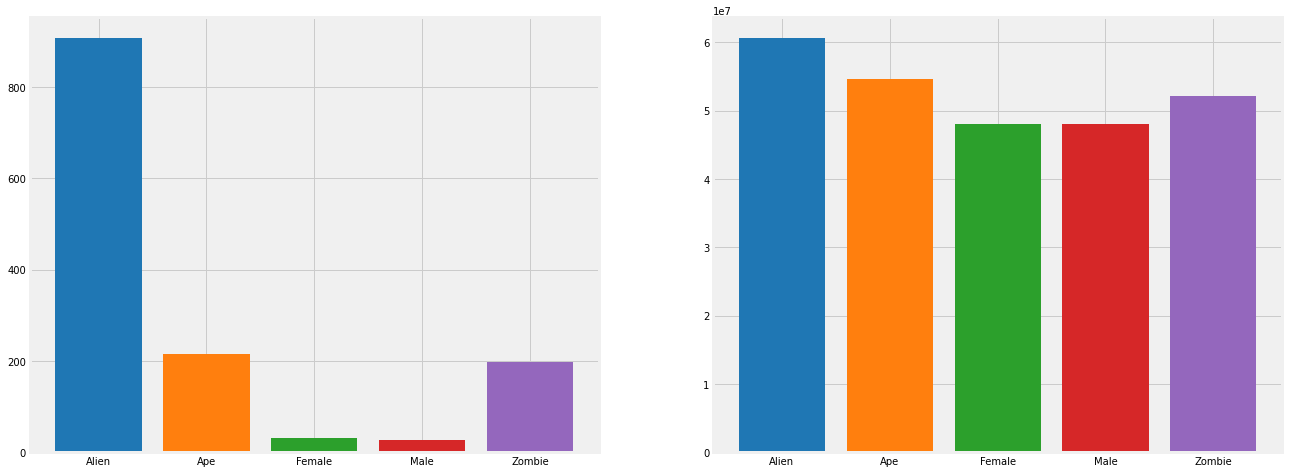

In [18]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
colors = cmap(np.arange(len(df_txn_history.groupby('type'))) % cmap.N)

ax1.bar(df_txn_history.groupby('type').mean()['eth'].index, df_txn_history.groupby('type').mean()['eth'], color=colors)
ax2.bar(df_txn_history.groupby('type').mean()['price_corrected'].index, df_txn_history.groupby('type').mean()['price_corrected'], color=colors)

First, when looking at `type`, there are several types in CryptoPunks. From the above left graph, the following is the order from highest to lowest value: Alien > Ape > Zombie > Female > Male. This order is the same when priced in USD (right graph).

In [19]:
df_txn_history['type'].value_counts()

Male      12709
Female     6023
Zombie      105
Ape          33
Alien        10
Name: type, dtype: int64

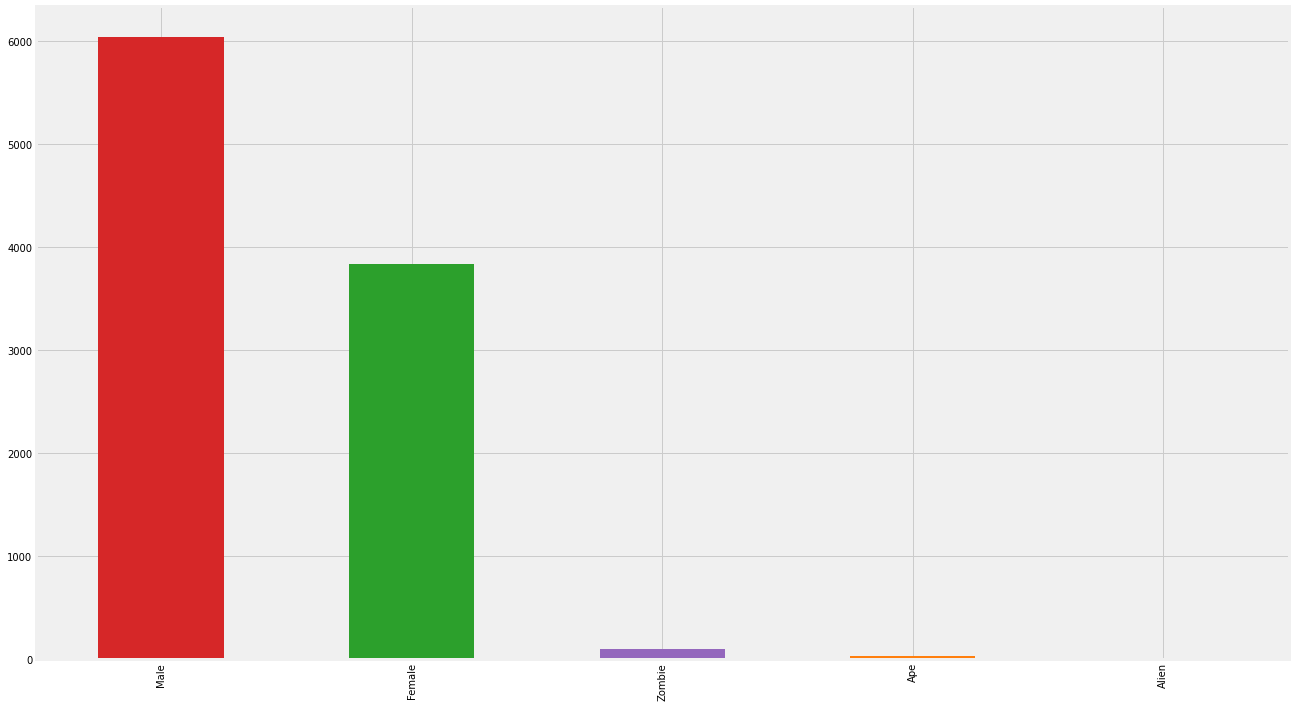

In [20]:
plt.rcParams["figure.figsize"] = (20,12)
colors = [colors[i] for i in [3, 2, 4, 1, 0]]

df_cryptopunks['type'].value_counts().plot(kind='bar', color=colors)

From the above graph, the order of rarity from highest to lowest is: Alien > Ape > Zombie >> Female > Male. Note that the order is the same as the previous graph showing NFT value by type.

### Do the NFTs with rare accessory have higher value?

In [21]:
df_cryptopunks['accessories'].str.split(' / ').explode().value_counts()

Earring            2459
Cigarette           961
Hot Lipstick        696
Purple Lipstick     655
Mole                644
                   ... 
Orange Side          68
Tiara                55
Pilot Helmet         54
Choker               48
Beanie               44
Name: accessories, Length: 87, dtype: int64

There are 87 accessories in the CryptoPunks. Each NFT wears a different combination of accessories. I calculated the average price of the most common accessories (Earring, Cigarette, Hot Lipstick, Purple Lipstick, Mole) and the rarest accessories (Orange Side, Tiara, Pilot Helmet, Choker, Beanie). The average price is denominated in both Ethereum and USD.

In [22]:
top_5_acc = df_cryptopunks['accessories'].str.split(' / ').explode().value_counts()[:5]
bot_5_acc = df_cryptopunks['accessories'].str.split(' / ').explode().value_counts()[-5:]

top_5_acc_mean = []
bot_5_acc_mean = []

for accessory in top_5_acc.keys():
  top_5_acc_mean.append(df_txn_history[df_txn_history[accessory] == 1]['eth'].mean())

for accessory in bot_5_acc.keys():
  bot_5_acc_mean.append(df_txn_history[df_txn_history[accessory] == 1]['eth'].mean())

print("mean ethereum of the most 5 common accessories: {:.1f}".format(np.mean(top_5_acc_mean)))
print("mean ethereum of the rarest 5 accessories: \t{:.1f}".format(np.mean(bot_5_acc_mean)))

mean ethereum of the most 5 common accessories: 28.9
mean ethereum of the rarest 5 accessories: 	56.5


In [23]:
top_5_acc = df_cryptopunks['accessories'].str.split(' / ').explode().value_counts()[:5]
bot_5_acc = df_cryptopunks['accessories'].str.split(' / ').explode().value_counts()[-5:]

top_5_acc_mean = []
bot_5_acc_mean = []

for accessory in top_5_acc.keys():
  top_5_acc_mean.append(df_txn_history[df_txn_history[accessory] == 1]['price_corrected'].mean())

for accessory in bot_5_acc.keys():
  bot_5_acc_mean.append(df_txn_history[df_txn_history[accessory] == 1]['price_corrected'].mean())

print("mean corrected price of the most 5 common accessories: \t{:.1f}".format(np.mean(top_5_acc_mean)))
print("mean corrected price of the rarest 5 accessories: \t{:.1f}".format(np.mean(bot_5_acc_mean)))

mean corrected price of the most 5 common accessories: 	48086830.3
mean corrected price of the rarest 5 accessories: 	49233566.1


NFTs with common accessories have less value based on this analysis. The following are the example images wearing common accessories.

In [24]:
print('Tokens with most 5 common accessories')
for accessory in top_5_acc.keys():
  print(df_txn_history[df_txn_history[accessory] == 1]['punk_id'].values[0], end=', ')
print('\n', top_5_acc.keys())

Tokens with most 5 common accessories
6229, 6229, 7866, 9571, 5734, 
 Index(['Earring', 'Cigarette', 'Hot Lipstick', 'Purple Lipstick', 'Mole'], dtype='object')


<div>
  <img src="https://deepnftvalue.com/static/sized_up/6229.png"/>
  <img src="https://deepnftvalue.com/static/sized_up/6229.png"/>
  <img src="https://deepnftvalue.com/static/sized_up/7866.png"/>
  <img src="https://deepnftvalue.com/static/sized_up/9571.png"/>
  <img src="https://deepnftvalue.com/static/sized_up/5734.png"/>
</div> 

NFTs with rare accessories have higher value based on this analysis. The following are example images wearing rare accessories.

In [25]:
print('Tokens with the rarest 5 accessories')
for accessory in bot_5_acc.keys():
  print(df_txn_history[df_txn_history[accessory] == 1]['punk_id'].values[0], end=', ')
print('\n', bot_5_acc.keys())

Tokens with the rarest 5 accessories
8230, 8527, 9417, 1684, 8840, 
 Index(['Orange Side', 'Tiara', 'Pilot Helmet', 'Choker', 'Beanie'], dtype='object')


<div>
  <img src="https://deepnftvalue.com/static/sized_up/8230.png"/>
  <img src="https://deepnftvalue.com/static/sized_up/8527.png"/>
  <img src="https://deepnftvalue.com/static/sized_up/9417.png"/>
  <img src="https://deepnftvalue.com/static/sized_up/1684.png"/>
  <img src="https://deepnftvalue.com/static/sized_up/8840.png"/>
</div> 

### Do NFTs with the cominbation of rare accessories have higher value?

In order to analyze whether the combination of rare accessories has higher NFT price, 1) sort accessories name by Alphabet 2) create accessory combination data by converting accessories list into string 3) convert into OneHotEncoding.

In [26]:
df_txn_history['accessorie_comb'] = df_txn_history['accessories'].apply(lambda x: ' / '.join(sorted(x)))
df_txn_history['accessorie_comb']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


12718     Cigarette / Earring / Eye Patch / Knitted Cap ...
12722                  Big Shades / Gold Chain / Police Cap
12734                                                      
12735        Chinstrap / Police Cap / Regular Shades / Vape
12751          Big Shades / Crazy Hair / Normal Beard Black
                                ...                        
167380                                   Frumpy Hair / Goat
167407                      Purple Lipstick / Straight Hair
167442           Bandana / Cigarette / Earring / Gold Chain
167448                            Cigarette / Straight Hair
167476                                Earring / Mohawk Dark
Name: accessorie_comb, Length: 18880, dtype: object

In [29]:
top_5_acc_comb = df_cryptopunks.accessories.value_counts()[:5]
bot_5_acc_comb = df_cryptopunks.accessories.value_counts()[-5:]

top_5_acc_comb_mean = []
bot_5_acc_comb_mean = []

for accessory in top_5_acc_comb.keys():
  top_5_acc_comb_mean.append(df_txn_history[df_txn_history['ac_'+' / '.join(sorted(accessory.split(' / ')))] == 1]['eth'].mean())

for accessory in bot_5_acc_comb.keys():
  bot_5_acc_comb_mean.append(df_txn_history[df_txn_history['ac_'+' / '.join(sorted(accessory.split(' / ')))] == 1]['eth'].mean())

print("mean eth of the most 5 common accessory combinations: \t{:.1f}".format(np.mean(top_5_acc_comb_mean)))
print("mean eth of the rarest 5 accessory combinations: \t{:.1f}".format(np.mean(bot_5_acc_comb_mean)))

mean eth of the most 5 common accessory combinations: 	227.7
mean eth of the rarest 5 accessory combinations: 	54.6


In [30]:
top_5_acc_comb = df_cryptopunks.accessories.value_counts()[:5]
bot_5_acc_comb = df_cryptopunks.accessories.value_counts()[-5:]

top_5_acc_comb_mean = []
bot_5_acc_comb_mean = []

for accessory in top_5_acc_comb.keys():
  top_5_acc_comb_mean.append(df_txn_history[df_txn_history['ac_'+' / '.join(sorted(accessory.split(' / ')))] == 1]['price_corrected'].mean())

for accessory in bot_5_acc_comb.keys():
  bot_5_acc_comb_mean.append(df_txn_history[df_txn_history['ac_'+' / '.join(sorted(accessory.split(' / ')))] == 1]['price_corrected'].mean())

print("mean corrected price of the most 5 common accessory combinations: \t{:.1f}".format(np.mean(top_5_acc_comb_mean)))
print("mean corrected price of the rarest 5 accessory combinations: \t\t{:.1f}".format(np.mean(bot_5_acc_comb_mean)))

mean corrected price of the most 5 common accessory combinations: 	51270072.4
mean corrected price of the rarest 5 accessory combinations: 		48073711.7


When comparing NFTs with 5 most common and most rare accessories, the combination of rare accessories show higher NFT price on average. Following are the sample NFTs. 

In [31]:
print('Tokens with the 5 common accessory combinations')
for accessory in top_5_acc_comb.keys():
  print(df_txn_history[df_txn_history['ac_'+' / '.join(sorted(accessory.split(' / ')))] == 1]['punk_id'].values[0], end=', ')
print('\n', top_5_acc_comb.keys().values)

Tokens with the rarest 5 accessory combinations
1069, 5822, 3100, 8219, 1855, 
 ['Cap' 'Bandana' 'Headband' 'Knitted Cap' 'Bandana / Earring']


<div>
  <img src="https://deepnftvalue.com/static/sized_up/1069.png"/>
  <img src="https://deepnftvalue.com/static/sized_up/5822.png"/>
  <img src="https://deepnftvalue.com/static/sized_up/3100.png"/>
  <img src="https://deepnftvalue.com/static/sized_up/8219.png"/>
  <img src="https://deepnftvalue.com/static/sized_up/1855.png"/>
</div> 

In [32]:
print('Tokens with the 5 rarest accessory combinations')
for accessory in bot_5_acc_comb.keys():
  print(df_txn_history[df_txn_history['ac_'+' / '.join(sorted(accessory.split(' / ')))] == 1]['punk_id'].values[0], end=', ')
print('\n', bot_5_acc_comb.keys().values)

Tokens with the rarest 5 accessory combinations
4283, 4282, 4280, 4279, 9998, 
 ['Cap / Shadow Beard / Earring / 3D Glasses'
 'Vampire Hair / Classic Shades'
 'Cap Forward / Frown / Shadow Beard / Regular Shades'
 'Straight Hair / Nerd Glasses'
 'Wild White Hair / Black Lipstick / Clown Eyes Green']


<div>
  <img src="https://deepnftvalue.com/static/sized_up/4283.png"/>
  <img src="https://deepnftvalue.com/static/sized_up/4282.png"/>
  <img src="https://deepnftvalue.com/static/sized_up/4280.png"/>
  <img src="https://deepnftvalue.com/static/sized_up/4279.png"/>
  <img src="https://deepnftvalue.com/static/sized_up/9998.png"/>
</div> 

### Comparison between Individual Accessories and Accessory Combinations 

The number of accessories (87) is not equal to the number of accessory combinations (6700). The analysis compares the top 10% of accessories (top 9) with top 10% of accessory combinations (top 670).  Similarly, the bottom 10% of accessories (bottom 9) are compared with bottom 10% of accessory combinations (bottom 670).  

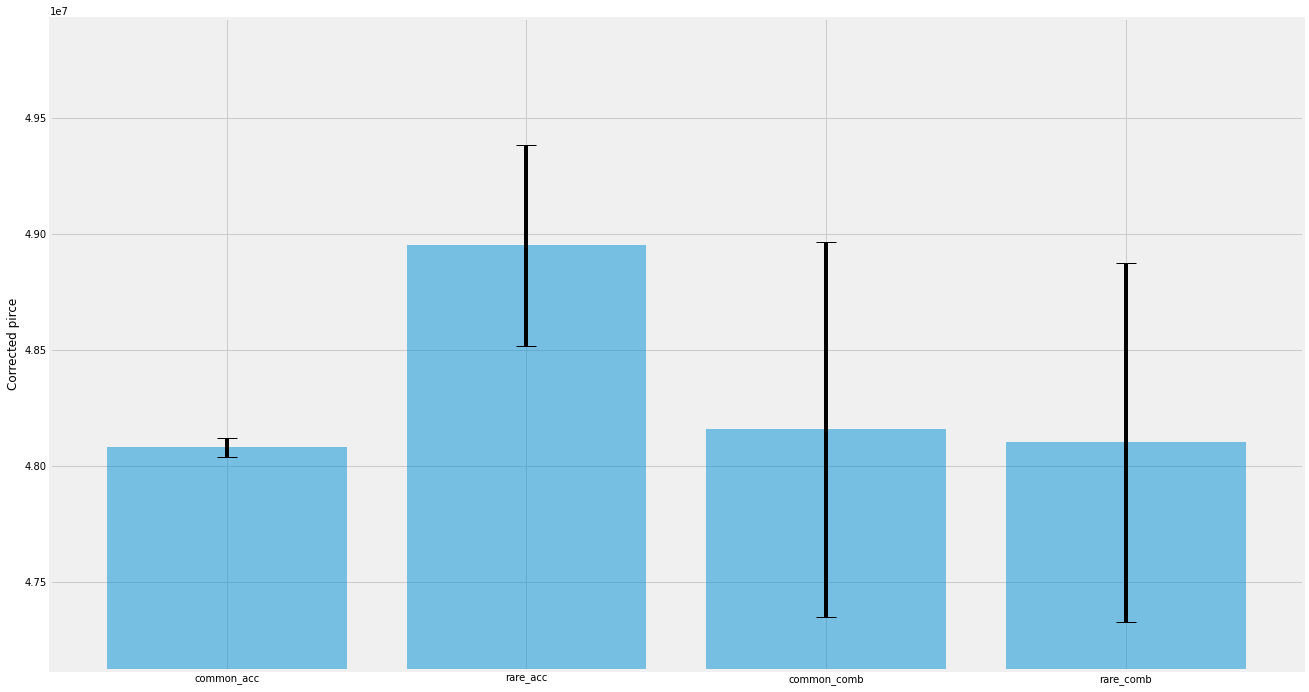

In [33]:
top_9_acc = df_cryptopunks['accessories'].str.split(' / ').explode().value_counts()[:9]
bot_9_acc = df_cryptopunks['accessories'].str.split(' / ').explode().value_counts()[-9:]

top_9_acc_mean = []
bot_9_acc_mean = []

for accessory in top_9_acc.keys():
  top_9_acc_mean.append(df_txn_history[df_txn_history[accessory] == 1]['price_corrected'].mean())

for accessory in bot_9_acc.keys():
  bot_9_acc_mean.append(df_txn_history[df_txn_history[accessory] == 1]['price_corrected'].mean())

top_670_acc_comb = df_cryptopunks.accessories.value_counts()[:670]
bot_670_acc_comb = df_cryptopunks.accessories.value_counts()[-670:]

top_670_acc_comb_mean = []
bot_670_acc_comb_mean = []

for accessory in top_670_acc_comb.keys():
  if 'ac_'+' / '.join(sorted(accessory.split(' / '))) in df_txn_history:
    top_670_acc_comb_mean.append(df_txn_history[df_txn_history['ac_'+' / '.join(sorted(accessory.split(' / ')))] == 1]['price_corrected'].mean())

for accessory in bot_670_acc_comb.keys():
  if 'ac_'+' / '.join(sorted(accessory.split(' / '))) in df_txn_history:
    bot_670_acc_comb_mean.append(df_txn_history[df_txn_history['ac_'+' / '.join(sorted(accessory.split(' / ')))] == 1]['price_corrected'].mean())

materials = ['common_acc', 'rare_acc', 'common_comb', 'rare_comb']
x_pos = np.arange(len(materials))
_mean = [np.mean(top_9_acc_mean), np.mean(bot_9_acc_mean), np.mean(top_670_acc_comb_mean), np.mean(bot_670_acc_comb_mean)]
_std = [np.std(top_9_acc_mean), np.std(bot_9_acc_mean), np.std(top_670_acc_comb_mean), np.std(bot_670_acc_comb_mean)]

# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, _mean, yerr=_std, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylim([np.min(_mean)*0.98, np.max(_mean)*1.02])
ax.set_ylabel('Corrected pirce')
ax.set_xticks(x_pos)
ax.set_xticklabels(materials)
ax.yaxis.grid(True)

# Save the figure and show
#plt.tight_layout()
plt.rcParams["figure.figsize"] = (20,12)
plt.show()

- common_acc: NFTs wearing at least one of the most 5 common accessories
- rare_acc: NFTs wearing at least one of the most 5 rare accessories
- common_comb: NFTs wearing at least one of the most 5 common accessory combinations
- rare_comb: NFTs wearing at least one of the most 5 rare accessory combinationa

From the above graphs, rarity of individual accessories positively affects NFT price. However, accessory combinations do not seem to affect the price and also demonstrates whide standard deviations.

## Training Model
- Use LGBMRegressor to train model and predict NFTs value.

In [42]:
df_txn_history_original = pd.read_json('/content/drive/MyDrive/txn_history-2021-10-07.jsonl', lines=True)

dummies = pd.get_dummies(df_txn_history[['source', 'type']])
df_txn_history = pd.concat([df_txn_history, dummies], axis=1).drop(['from', 'to', 'date', 'timestamp', 'source', 'type', 'txn_type', 'from_wallet_address', 'to_wallet_address', '날짜', '종가', 'price', 'rolling_mean_price', 'price_error_ratio', 'accessories', 'accessorie_comb'], axis=1).dropna()

In [43]:
X = df_txn_history.dropna().drop(['eth', 'price_corrected'], axis=1)
y1 = df_txn_history.dropna()['eth']
y2 = df_txn_history.dropna()['price_corrected']

Some NFTs in the dataset may have multiple sales transactions. In this case, due to the nature of the time series, if the case of the test set occurred before the transaction of the train set, it only shows the correlation between the two and cannot predict the future price. Therefore, the dataset was split into train and test set based on punk_id, and the transaction of punk_id used for training was split so that it was not used in the test process.

In [44]:
#X_train, X_test, y_train, y_test = train_test_split(X.values, y1.values, test_size=0.01, random_state=22)

uniq_list = X['punk_id'].unique()
train_split, test_split = train_test_split(uniq_list, test_size=0.01, random_state=20, shuffle=True)
X_train = X[X['punk_id'].isin(train_split)]
X_test = X[X['punk_id'].isin(test_split)]
y_train = y2[X['punk_id'].isin(train_split)]
y_test = y2[X['punk_id'].isin(test_split)]

In [45]:
model = lgb.LGBMRegressor(n_estimators=1000, learning_rate=0.1)

In [46]:
model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=100, verbose=False)

mae_closing_ratio = mean_absolute_error(model.predict(X_test), y_test)/df_eth_price['종가'][0]
mae_max_ratio = mean_absolute_error(model.predict(X_test), y_test)/df_txn_history['price_corrected'].max()*100
mae_last_ratio = mean_absolute_error(model.predict(X_test), y_test)/df_txn_history['price_corrected'].values[-1]*100

print('MAE: {:.2f} eth'.format(mae_closing_ratio))
print('Error ratio to most expensive transaction: {:.2f}%'.format(mae_max_ratio))
print('Error ratio to last transaction: {:.2f}%'.format(mae_last_ratio))

LGBMRegressor(n_estimators=1000) 
MAE: 30.20 eth 
Error ratio to most expensive transaction: 0.14% 
Error ratio to last transaction: 0.23%

In the training model, use max value in the `days` to see the price of ever NFTs on the same date.

In [48]:
X['days']=df_txn_history['days'].max()
X

,punk_id,days,3D Glasses,Bandana,Beanie,Big Beard,Big Shades,Black Lipstick,Blonde Bob,Blonde Short,Blue Eye Shadow,Buck Teeth,Cap,Cap Forward,Chinstrap,Choker,Cigarette,Classic Shades,Clown Eyes Blue,Clown Eyes Green,Clown Hair Green,Clown Nose,Cowboy Hat,Crazy Hair,Dark Hair,Do-rag,Earring,Eye Mask,Eye Patch,Fedora,Front Beard,Front Beard Dark,Frown,Frumpy Hair,Goat,Gold Chain,Green Eye Shadow,Half Shaved,Handlebars,Headband,...,ac_Small Shades,ac_Small Shades / Stringy Hair,ac_Small Shades / Top Hat,ac_Small Shades / Vampire Hair,ac_Small Shades / Wild Hair,ac_Smile,ac_Smile / Stringy Hair,ac_Smile / Top Hat,ac_Smile / Wild Hair,ac_Spots / Stringy Hair,ac_Spots / Tassle Hat,ac_Spots / VR / Wild Hair,ac_Spots / Vampire Hair,ac_Spots / Wild Blonde,ac_Spots / Wild White Hair,ac_Straight Hair,ac_Straight Hair Blonde,ac_Straight Hair Blonde / Welding Goggles,ac_Stringy Hair,ac_Stringy Hair / VR,ac_Stringy Hair / Vape,ac_Tassle Hat / VR,ac_Tiara,ac_Top Hat,ac_Top Hat / VR,ac_VR,ac_VR / Wild Hair,ac_Vampire Hair,ac_Vape / Wild Hair,ac_Welding Goggles / Wild Blonde,ac_Welding Goggles / Wild Hair,ac_Wild Blonde,ac_Wild Hair,source_larvalabs,source_opensea,type_Alien,type_Ape,type_Female,type_Male,type_Zombie
12718,6229,1567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
12722,6687,1567,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
12735,7001,1567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
12751,6642,1567,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
12760,1802,1567,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167380,4843,1567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
167407,5266,1567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
167442,5175,1567,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
167448,1187,1567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In order to see which index has higher NFT price, use argsort function, then flip it to sort by descending.

### Which NFTs have high predicted values?

<div>
  <img src="https://deepnftvalue.com/static/sized_up/3100.png"/>
  <img src="https://deepnftvalue.com/static/sized_up/7804.png"/>
  <img src="https://deepnftvalue.com/static/sized_up/5217.png"/>
  <img src="https://deepnftvalue.com/static/sized_up/2890.png"/>
  <img src="https://deepnftvalue.com/static/sized_up/6965.png"/>
</div> 

In [50]:
def print_punk_info(punk_id):
  punk_type = df_txn_history_original[df_txn_history_original['punk_id']==punk_id].type.values[0]
  accs = df_txn_history_original[df_txn_history_original['punk_id']==punk_id].accessories.values[0]
  txn_cnt = df_txn_history_original[df_txn_history_original['punk_id']==punk_id].groupby('txn_type')['punk_id'].count()
  popularity = 0
  print(punk_id)
  print(punk_type)
  print(accs)
  if 'Sold' in txn_cnt:
    print(txn_cnt['Sold'], end=', ')
  if 'Bid' in txn_cnt:
    print(txn_cnt['Bid'], end=', ')
  if 'Offered' in txn_cnt:
    print(txn_cnt['Offered'], end=', ')
  print()
  print()

In [51]:
for punk_id in [3100, 7804, 5217, 2890, 6965]:
  print_punk_info(punk_id)

3100
['Alien']
['Headband']
2, 21, 3, 

7804
['Alien']
['Cap Forward', 'Pipe', 'Small Shades']
2, 53, 14, 

5217
['Ape']
['Gold Chain', 'Knitted Cap']
2, 11, 7, 

9368
['Alien']
['Cap']
2, 22, 1, 

7252
['Ape']
['Fedora']
4, 18, 19, 



### Which NFTs have low predicted values?

<div>
  <img src="https://deepnftvalue.com/static/sized_up/916.png"/>
  <img src="https://deepnftvalue.com/static/sized_up/9806.png"/>
  <img src="https://deepnftvalue.com/static/sized_up/7449.png"/>
  <img src="https://deepnftvalue.com/static/sized_up/1962.png"/>
  <img src="https://deepnftvalue.com/static/sized_up/1379.png"/>
</div> 

In [53]:
for punk_id in [916, 9806, 7449, 1962, 1379]:
  print_punk_info(punk_id)

916
['Female']
['Headband']
2, 2, 5, 

9806
['Female']
['Mole', 'Knitted Cap', 'Nerd Glasses']
1, 1, 3, 

7449
['Male']
['Cigarette', 'Front Beard Dark', 'Do-rag', 'Small Shades']
1, 1, 2, 

1962
['Female']
['Green Eye Shadow', 'Headband', 'Earring']
1, 1, 8, 

1379
['Female']
['Purple Eye Shadow', 'Headband', 'Purple Lipstick']
3, 1, 9, 



### Results from Training Model
- NFT Price and Type: NFTs with rare type (Alien and Ape) showed higher price while ones with common types (female and male) predicted relatively lower price.
- NFT Price and Accessories: NFTs with at least one of the common accessories were predicted to have a low price.

Overall, there was a strong relationship between NFT price, type and rarity. In terms of rarity in accessories, common accessories tended to result in lower price, but there were some exceptions as it was hard to see impact of individual accessory.

## Conclusion
This project highlights the complex relationship between NFT price and the rarity of its attributes. One of the approaches to compare price is by calculating its current value with the moving average of recent NFTs transactions in both Ethereum and USD. Ethereum value is calculated by daily closing price in dollar.

Rarity in type had the strongest impact on price. Rarity of individual accessories positively impacted price.  However, the rarity of a combination of accessories did not show a clear relationship with price.

This project compares analysis from the data and prediction from the trained model using Light GBM Regressor. The analysis corroborated that accessory rarity positively impacted price, but with some exceptions.

### License
<a href="https://larvalabs.com/cryptopunks">Larva Labs</a> <br/>
<a href="https://deepnftvalue.com/">NFT Project</a> <br/>
<a href="https://www.investing.com/crypto/ethereum">Ethereum Price</a>